In [ ]:
# Punnaruck Khapholdi

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from random import randint

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score,roc_auc_score, f1_score, accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve



In [2]:
# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
all_df = [train_df, test_df]

In [3]:
# Show sample data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Show data info
print(train_df.info())
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Show data info for category column
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hegarty, Miss. Hanora ""Nora""",male,347082,G6,S
freq,1,577,7,4,644


In [9]:
で

train_df columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
test_df columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hegarty, Miss. Hanora ""Nora""",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Survived
   Sex_Index  Survived
0          0       109
1          1       233
Died
   Sex_Index  Survived
0          0       468
1          1        81


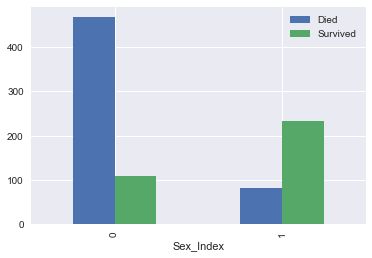

In [15]:
# Sex Index
for dataset in all_df:
    dataset['Sex_Index'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
print("Survived")
print(train_df[train_df.Survived==1][['Sex_Index', 'Survived']].groupby(['Sex_Index'], as_index=False).count())
print("Died")
print(train_df[train_df.Survived==0][['Sex_Index', 'Survived']].groupby(['Sex_Index'], as_index=False).count())

SexSurvived = train_df[train_df.Survived==1][['Sex_Index', 'Survived']] \
    .groupby(['Sex_Index'], as_index=False).count()['Survived'].values
SexDied = train_df[train_df.Survived==0][['Sex_Index', 'Survived']] \
    .groupby(['Sex_Index'], as_index=False).count()['Survived'].values
    
index = train_df[train_df.Survived==0][['Sex_Index', 'Survived']] \
    .groupby(['Sex_Index'], as_index=False).count()['Sex_Index']
    
df = pd.DataFrame({'Survived': SexSurvived,
                   'Died': SexDied}, index=index)

df.plot.bar(rot=0)

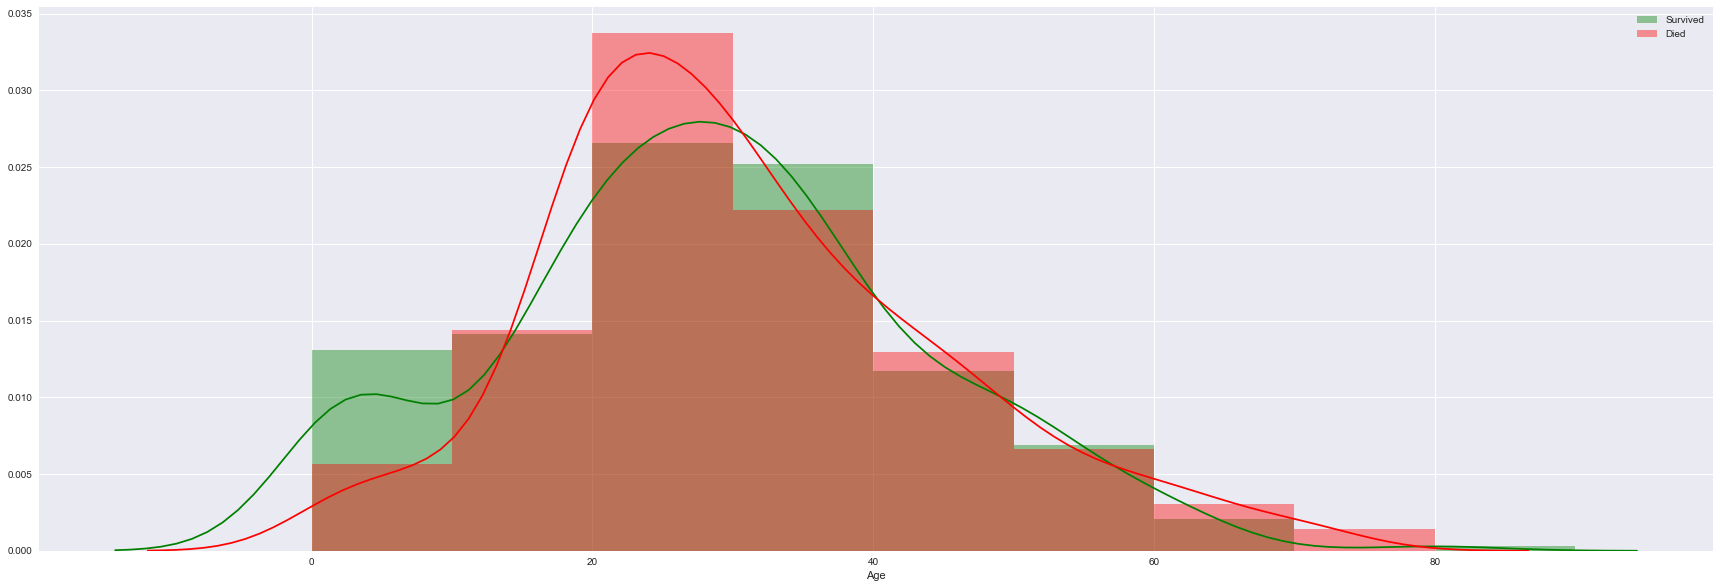

In [20]:
# Plot Age
ageSurvived = train_df[(train_df.Survived == 1) & (np.isnan(train_df.Age) == False)]['Age']
ageDied = train_df[(train_df.Survived == 0) & (np.isnan(train_df.Age) == False)]['Age']

plt.figure(figsize=(30, 10))
sns.distplot( ageSurvived ,bins=range(0,100,10), color="green", label="Survived")
sns.distplot( ageDied ,bins=range(0,100,10), color="red", label="Died")
plt.legend()

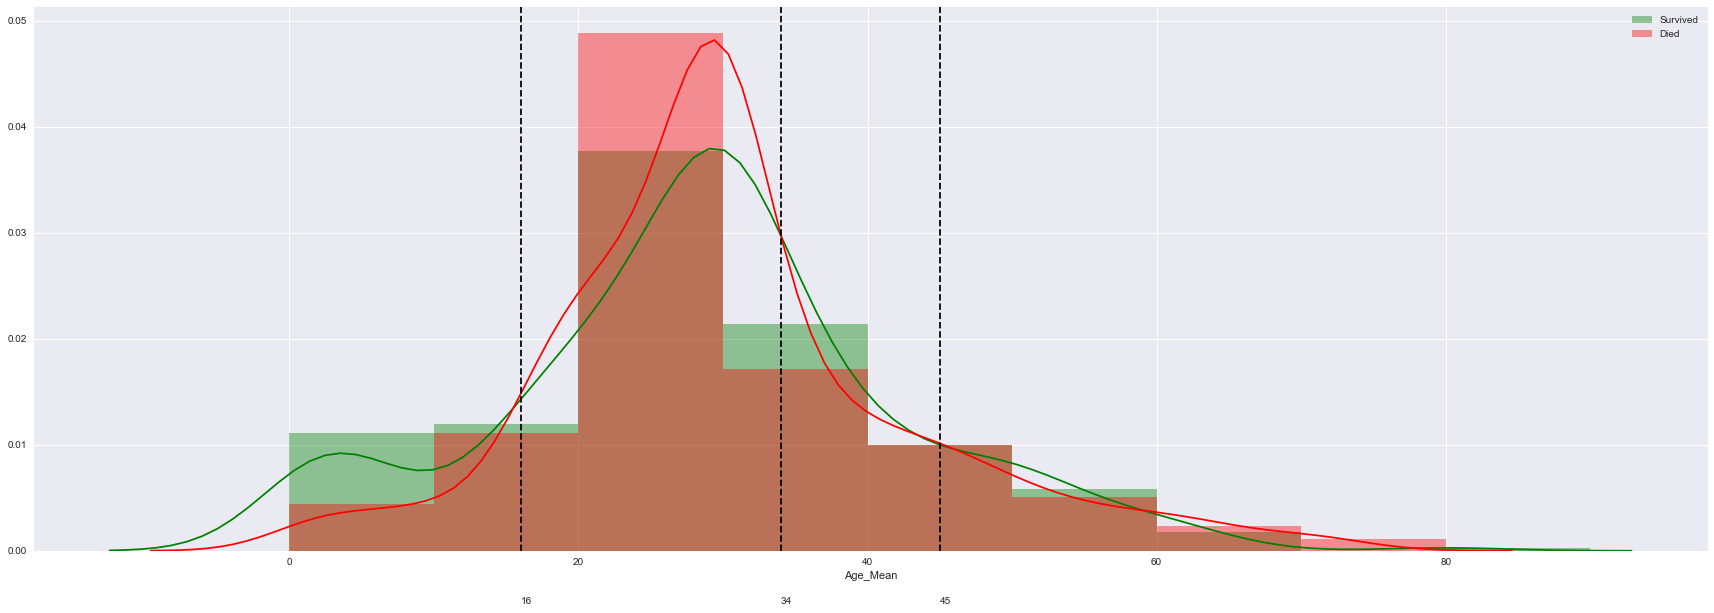

In [21]:
# Fill missing Age with mean of Age
for dataset in all_df:    
    dataset['Age_Mean'] = dataset['Age']
    dataset['Age_Mean'].fillna(dataset['Age_Mean'].mean(), inplace = True)
    
# Plot Age Mean
ageSurvived = train_df[(train_df.Survived == 1)]['Age_Mean']
ageDied = train_df[(train_df.Survived == 0)]['Age_Mean']

plt.figure(figsize=(30, 10))
sns.distplot( ageSurvived ,bins=range(0,100,10), color="green", label="Survived")
sns.distplot( ageDied ,bins=range(0,100,10), color="red", label="Died")
plt.legend()

plt.text(16, -0.005,'16')
plt.axvline(x=16, color='k', linestyle='--')

plt.text(34, -0.005,'34')
plt.axvline(x=34, color='k', linestyle='--')

plt.text(45, -0.005,'45')
plt.axvline(x=45, color='k', linestyle='--')

   Age_Mean_Band  Survived
0              0       100
1              1       555
2              2       133
3              3       103


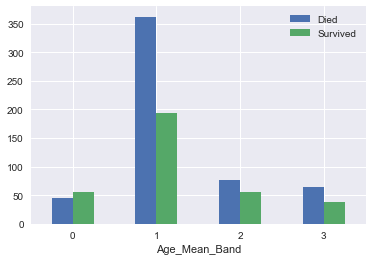

In [22]:
# Group Age Mean
for dataset in all_df:   
    dataset['Age_Mean_Band'] = 0
    dataset.loc[ dataset['Age_Mean'] <= 16, 'Age_Mean_Band'] = 0
    dataset.loc[(dataset['Age_Mean'] > 16) & (dataset['Age_Mean'] <= 34), 'Age_Mean_Band'] = 1
    dataset.loc[(dataset['Age_Mean'] > 34) & (dataset['Age_Mean'] <= 45), 'Age_Mean_Band'] = 2
    dataset.loc[ dataset['Age_Mean'] > 45, 'Age_Mean_Band'] = 3
    dataset['Age_Mean_Band'] = dataset['Age_Mean_Band'].astype(int)
    
print(train_df[['Age_Mean_Band', 'Survived']].groupby(['Age_Mean_Band'], as_index=False).count())

# Plot Age Mean Band Survived
AgeBinSurvived = train_df[train_df.Survived==1][['Age_Mean_Band', 'Survived']] \
    .groupby(['Age_Mean_Band'], as_index=False).count()['Survived'].values
AgeBinDied = train_df[train_df.Survived==0][['Age_Mean_Band', 'Survived']] \
    .groupby(['Age_Mean_Band'], as_index=False).count()['Survived'].values

index = train_df[train_df.Survived==1][['Age_Mean_Band', 'Survived']] \
    .groupby(['Age_Mean_Band'], as_index=False).count()['Age_Mean_Band']
    
df = pd.DataFrame({'Survived': AgeBinSurvived,
                   'Died': AgeBinDied}, index=index)

ax = df.plot.bar(rot=0)

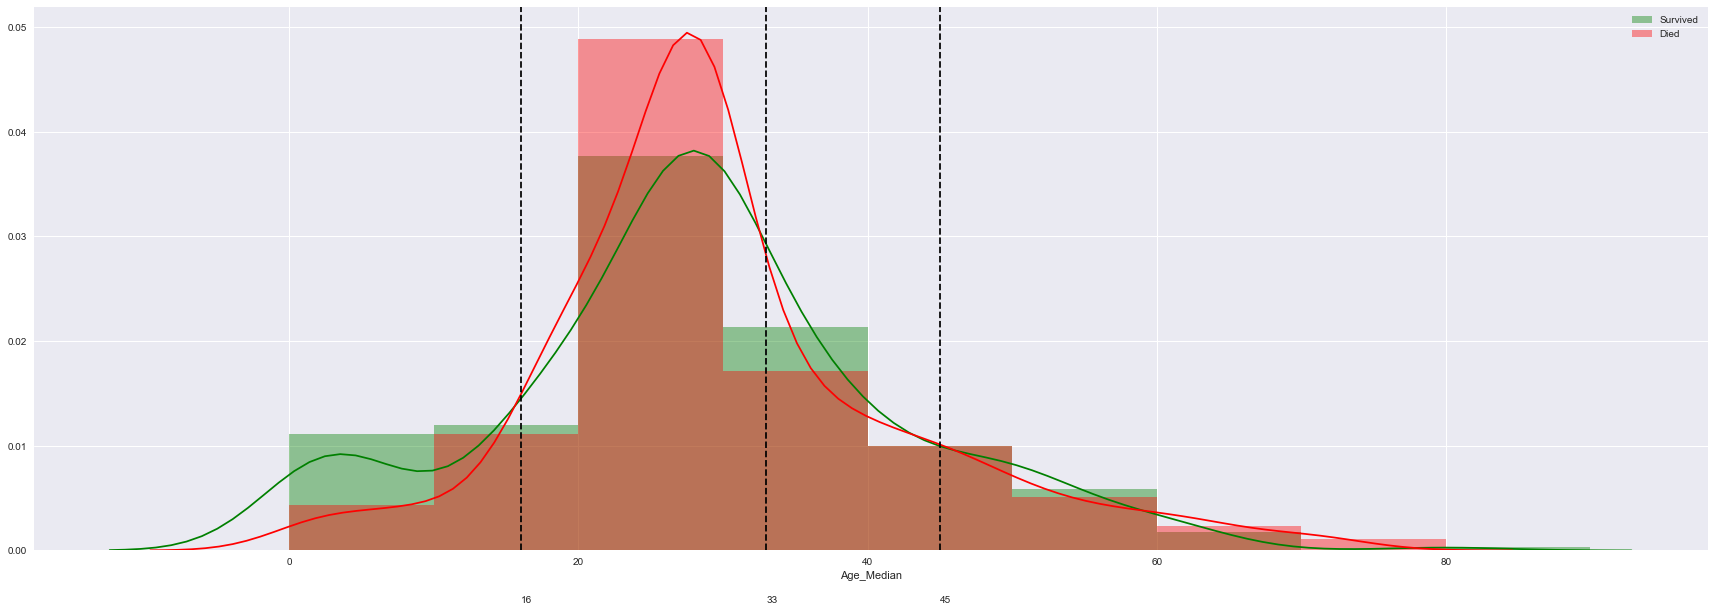

In [23]:
# Fill missing Age with median of Age
for dataset in all_df:    
    dataset['Age_Median'] = dataset['Age']
    dataset['Age_Median'].fillna(dataset['Age_Median'].median(), inplace = True)
    
# Plot Age median
ageSurvived = train_df[(train_df.Survived == 1)]['Age_Median']
ageDied = train_df[(train_df.Survived == 0)]['Age_Median']

plt.figure(figsize=(30, 10))
sns.distplot( ageSurvived ,bins=range(0,100,10), color="green", label="Survived")
sns.distplot( ageDied ,bins=range(0,100,10), color="red", label="Died")
plt.legend()

plt.text(16, -0.005,'16')
plt.axvline(x=16, color='k', linestyle='--')

plt.text(33, -0.005,'33')
plt.axvline(x=33, color='k', linestyle='--')

plt.text(45, -0.005,'45')
plt.axvline(x=45, color='k', linestyle='--')

   Age_Median_Band  Survived
0                0       100
1                1       540
2                2       148
3                3       103


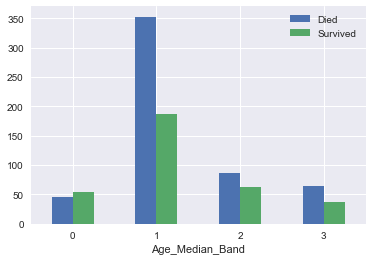

In [24]:
# Group Age Mean
for dataset in all_df:   
    dataset['Age_Median_Band'] = 0
    dataset.loc[ dataset['Age_Median'] <= 16, 'Age_Median_Band'] = 0
    dataset.loc[(dataset['Age_Median'] > 16) & (dataset['Age_Median'] <= 33), 'Age_Median_Band'] = 1
    dataset.loc[(dataset['Age_Median'] > 33) & (dataset['Age_Median'] <= 45), 'Age_Median_Band'] = 2
    dataset.loc[ dataset['Age_Median'] > 45, 'Age_Median_Band'] = 3
    dataset['Age_Median_Band'] = dataset['Age_Median_Band'].astype(int)
    
print(train_df[['Age_Median_Band', 'Survived']].groupby(['Age_Median_Band'], as_index=False).count())

# Plot Age Mean Band Survived
AgeBinSurvived = train_df[train_df.Survived==1][['Age_Median_Band', 'Survived']] \
    .groupby(['Age_Median_Band'], as_index=False).count()['Survived'].values
AgeBinDied = train_df[train_df.Survived==0][['Age_Median_Band', 'Survived']] \
    .groupby(['Age_Median_Band'], as_index=False).count()['Survived'].values

index = train_df[train_df.Survived==1][['Age_Median_Band', 'Survived']] \
    .groupby(['Age_Median_Band'], as_index=False).count()['Age_Median_Band']
    
df = pd.DataFrame({'Survived': AgeBinSurvived,
                   'Died': AgeBinDied}, index=index)

ax = df.plot.bar(rot=0)

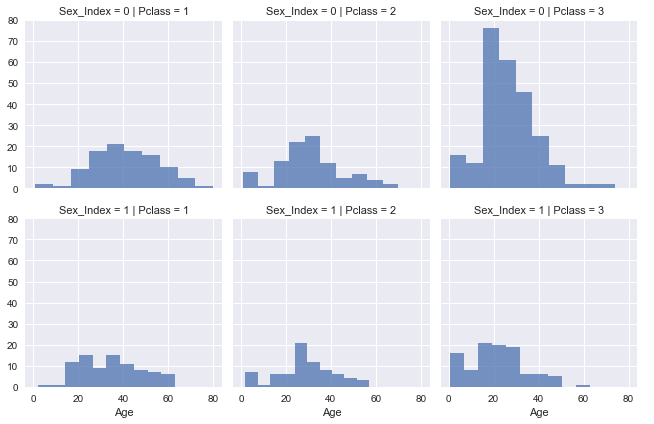

In [25]:
# Plot histrogram Sex and Pclass
h = sns.FacetGrid(train_df, row = 'Sex_Index', col = 'Pclass')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

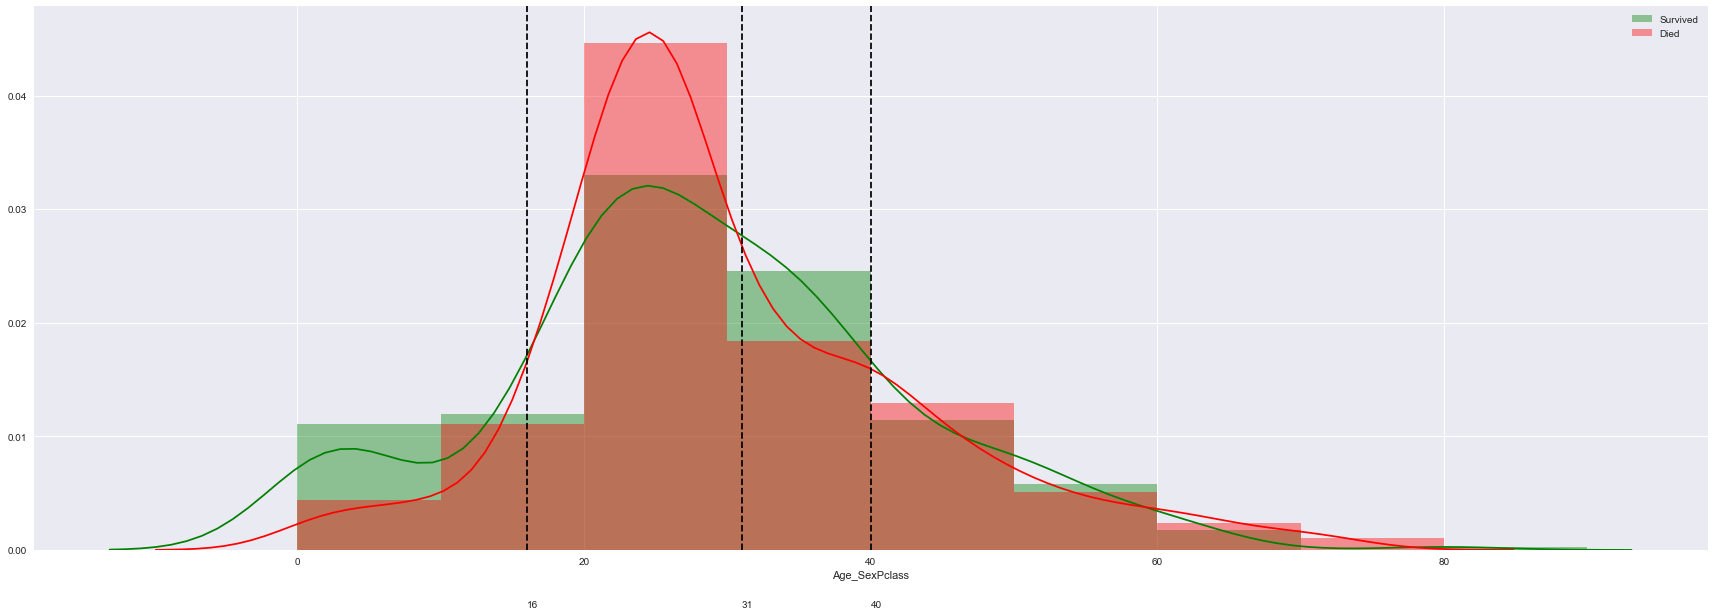

In [26]:
# Fill missing Age from Sex and Pclass
for dataset in all_df:
    dataset['Age_SexPclass'] = dataset['Age']

    for i in range(0, 2):
        for j in range(0, 3):
            # Median Age of Sex and Pclass Index
            median_age = dataset[(dataset['Sex_Index'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age_SexPclass'].dropna().median()
            
            guess_ages = int(round(( median_age)))
            #guess_ages = int( median_age/0.5 + 0.5 ) * 0.5
            dataset.loc[ (dataset.Age_SexPclass.isnull()) & (dataset.Sex_Index == i) & (dataset.Pclass == j+1),\
                    'Age_SexPclass'] = guess_ages

    dataset['Age_SexPclass'] = dataset['Age_SexPclass'].astype(int)
    
# Plot Age from Sex and Pclass
ageSurvived = train_df[(train_df.Survived == 1)]['Age_SexPclass']
ageDied = train_df[(train_df.Survived == 0)]['Age_SexPclass']

plt.figure(figsize=(30, 10))
sns.distplot( ageSurvived ,bins=range(0,100,10), color="green", label="Survived")
sns.distplot( ageDied ,bins=range(0,100,10), color="red", label="Died")
plt.legend()

plt.text(16, -0.005,'16')
plt.axvline(x=16, color='k', linestyle='--')

plt.text(31, -0.005,'31')
plt.axvline(x=31, color='k', linestyle='--')

plt.text(40, -0.005,'40')
plt.axvline(x=40, color='k', linestyle='--')

   Age_SexPclass_Band  Survived
0                   0       100
1                   1       475
2                   2       168
3                   3       148


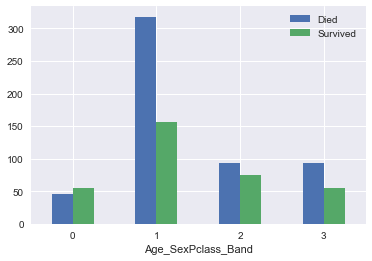

In [27]:
# Group Age Sex and PClass
for dataset in all_df:   
    dataset['Age_SexPclass_Band'] = 0
    dataset.loc[ dataset['Age_SexPclass'] <= 16, 'Age_SexPclass_Band'] = 0
    dataset.loc[(dataset['Age_SexPclass'] > 16) & (dataset['Age_SexPclass'] <= 31), 'Age_SexPclass_Band'] = 1
    dataset.loc[(dataset['Age_SexPclass'] > 31) & (dataset['Age_SexPclass'] <= 40), 'Age_SexPclass_Band'] = 2
    dataset.loc[ dataset['Age_SexPclass'] > 40, 'Age_SexPclass_Band'] = 3
    dataset['Age_SexPclass_Band'] = dataset['Age_SexPclass_Band'].astype(int)
    
print(train_df[['Age_SexPclass_Band', 'Survived']].groupby(['Age_SexPclass_Band'], as_index=False).count())

# Plot Age Mean Band Survived
AgeBinSurvived = train_df[train_df.Survived==1][['Age_SexPclass_Band', 'Survived']] \
    .groupby(['Age_SexPclass_Band'], as_index=False).count()['Survived'].values
AgeBinDied = train_df[train_df.Survived==0][['Age_SexPclass_Band', 'Survived']] \
    .groupby(['Age_SexPclass_Band'], as_index=False).count()['Survived'].values

index = train_df[train_df.Survived==1][['Age_SexPclass_Band', 'Survived']] \
    .groupby(['Age_SexPclass_Band'], as_index=False).count()['Age_SexPclass_Band']
    
df = pd.DataFrame({'Survived': AgeBinSurvived,
                   'Died': AgeBinDied}, index=index)

ax = df.plot.bar(rot=0)

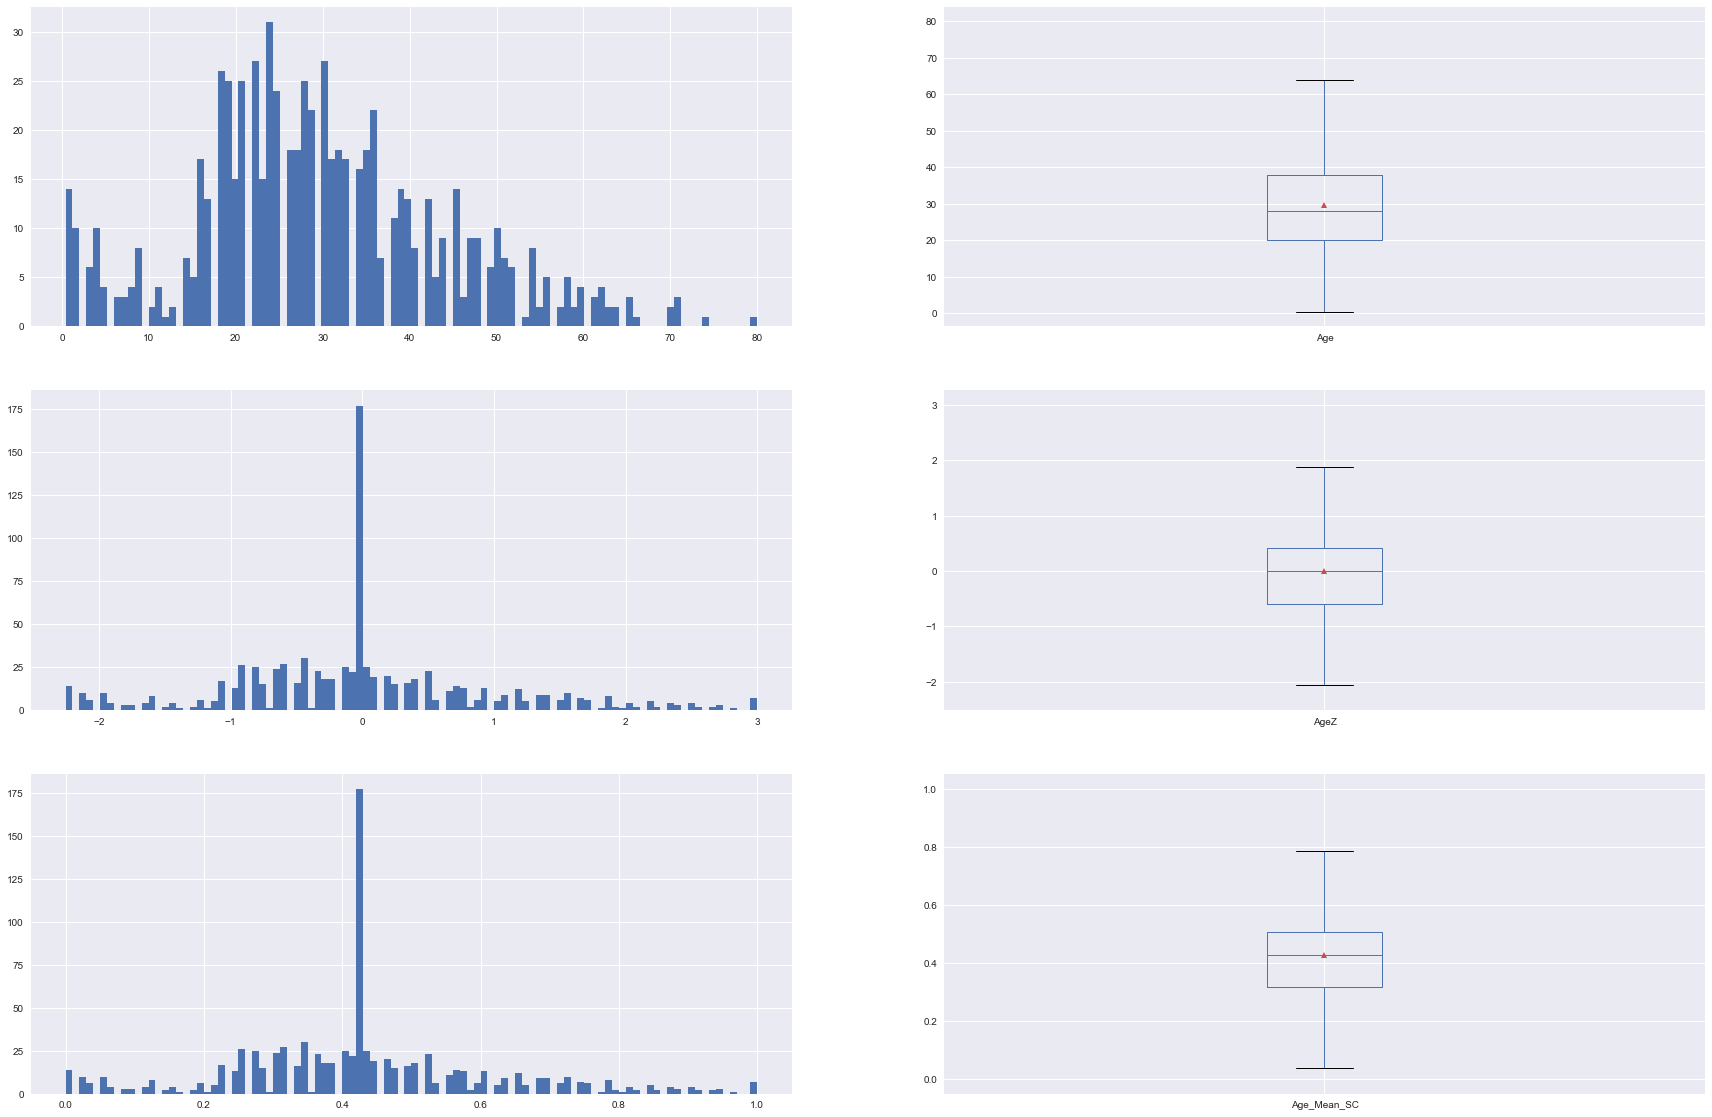

In [28]:
# Transform Age Mean Feature
ageTrainMean = train_df['Age_Mean'].mean()
ageTrainStd = train_df['Age_Mean'].std(ddof=0)

for dataset in all_df: 
        
    # Calculate z-score of Transformed Age Column
    dataset["AgeZ"] = (dataset['Age_Mean'] - ageTrainMean)/ageTrainStd
    
    # Manage outlier data
    dataset.loc[dataset.AgeZ > 3, "AgeZ"] = 3
    dataset.loc[dataset.AgeZ < -3, "AgeZ"] = -3

scaler = MinMaxScaler()
scaler.fit(train_df[['AgeZ']].values)

train_df['Age_Mean_SC'] = scaler.transform(train_df[['AgeZ']].values)
test_df['Age_Mean_SC'] = scaler.transform(test_df[['AgeZ']].values)
    
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20));
train_df['Age'].hist(bins=100, ax=axes[0][0])
train_df['AgeZ'].hist(bins=100, ax=axes[1][0])
train_df['Age_Mean_SC'].hist(bins=100, ax=axes[2][0])

train_df[['Age']].boxplot(ax=axes[0][1], showmeans=True)
train_df[['AgeZ']].boxplot(ax=axes[1][1], showmeans=True)
train_df[['Age_Mean_SC']].boxplot(ax=axes[2][1], showmeans=True)

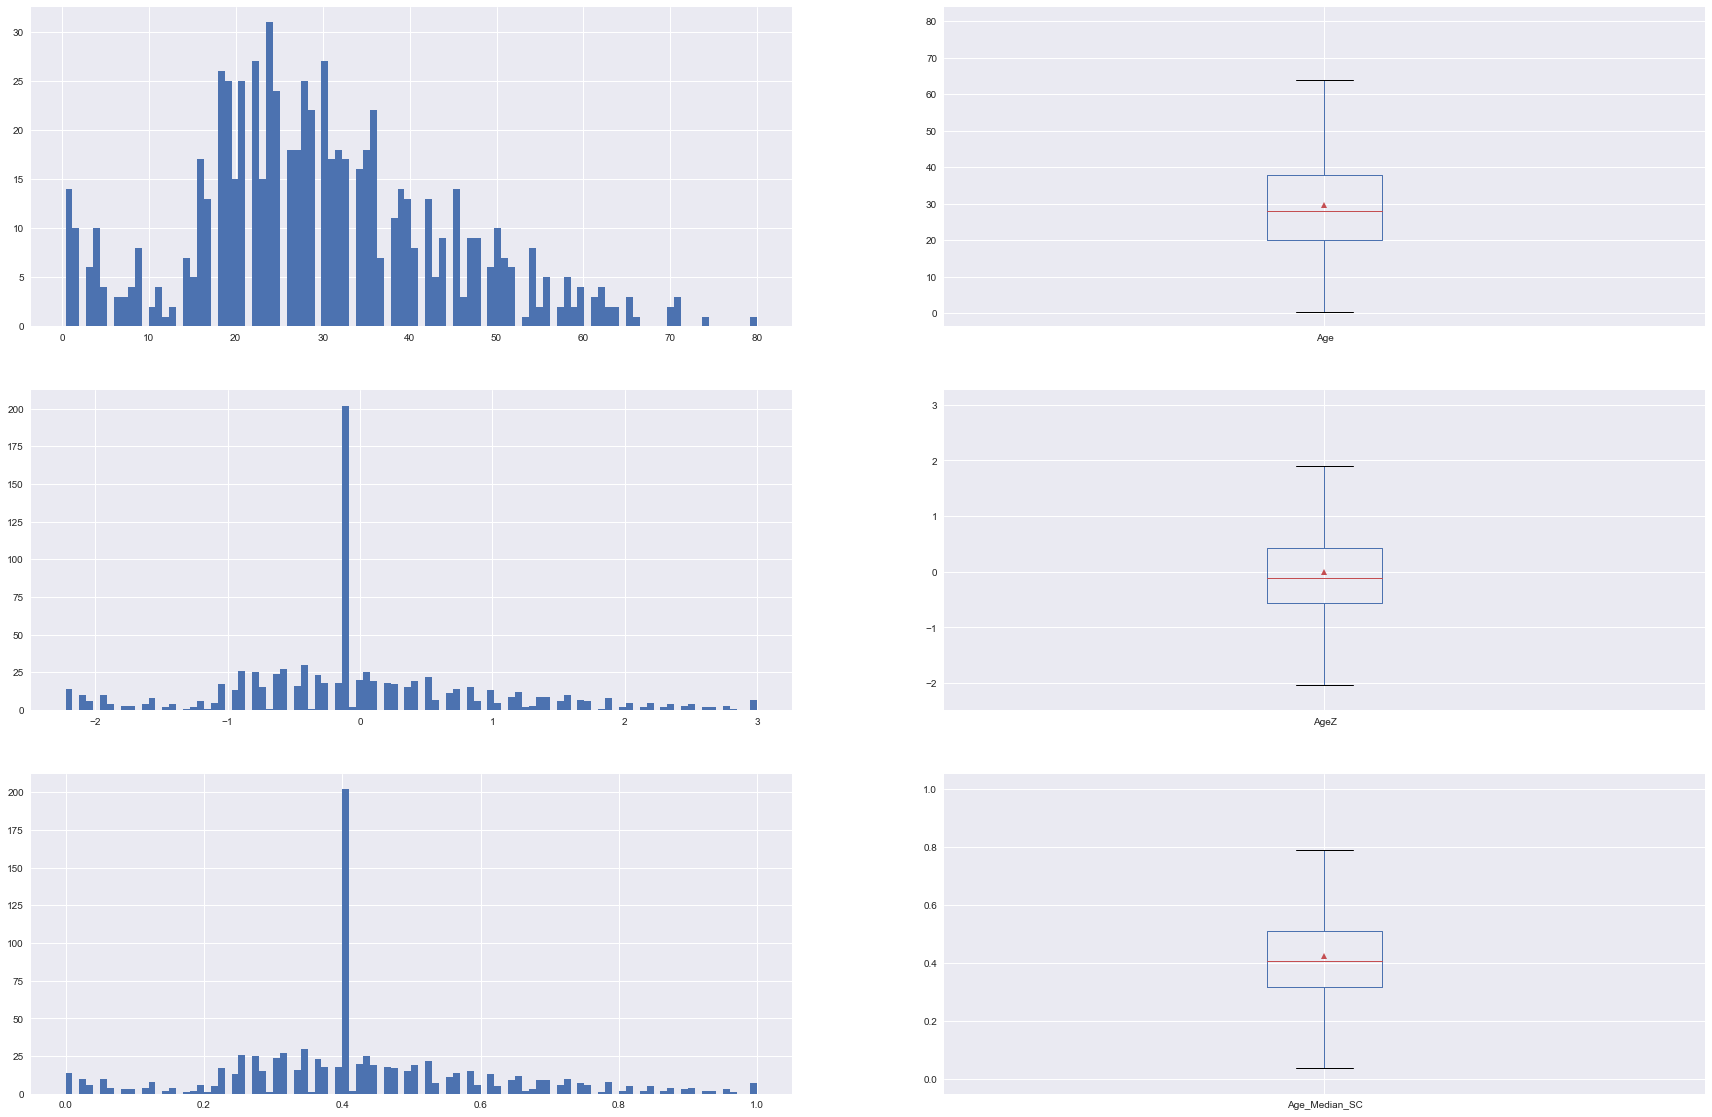

In [29]:
# Transform Age Median Feature
ageTrainMean = train_df['Age_Median'].mean()
ageTrainStd = train_df['Age_Median'].std(ddof=0)

for dataset in all_df: 
        
    # Calculate z-score of Transformed Age Column
    dataset["AgeZ"] = (dataset['Age_Median'] - ageTrainMean)/ageTrainStd
    
    # Manage outlier data
    dataset.loc[dataset.AgeZ > 3, "AgeZ"] = 3
    dataset.loc[dataset.AgeZ < -3, "AgeZ"] = -3

scaler = MinMaxScaler()
scaler.fit(train_df[['AgeZ']].values)

train_df['Age_Median_SC'] = scaler.transform(train_df[['AgeZ']].values)
test_df['Age_Median_SC'] = scaler.transform(test_df[['AgeZ']].values)
    
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20));
train_df['Age'].hist(bins=100, ax=axes[0][0])
train_df['AgeZ'].hist(bins=100, ax=axes[1][0])
train_df['Age_Median_SC'].hist(bins=100, ax=axes[2][0])

train_df[['Age']].boxplot(ax=axes[0][1], showmeans=True)
train_df[['AgeZ']].boxplot(ax=axes[1][1], showmeans=True)
train_df[['Age_Median_SC']].boxplot(ax=axes[2][1], showmeans=True)

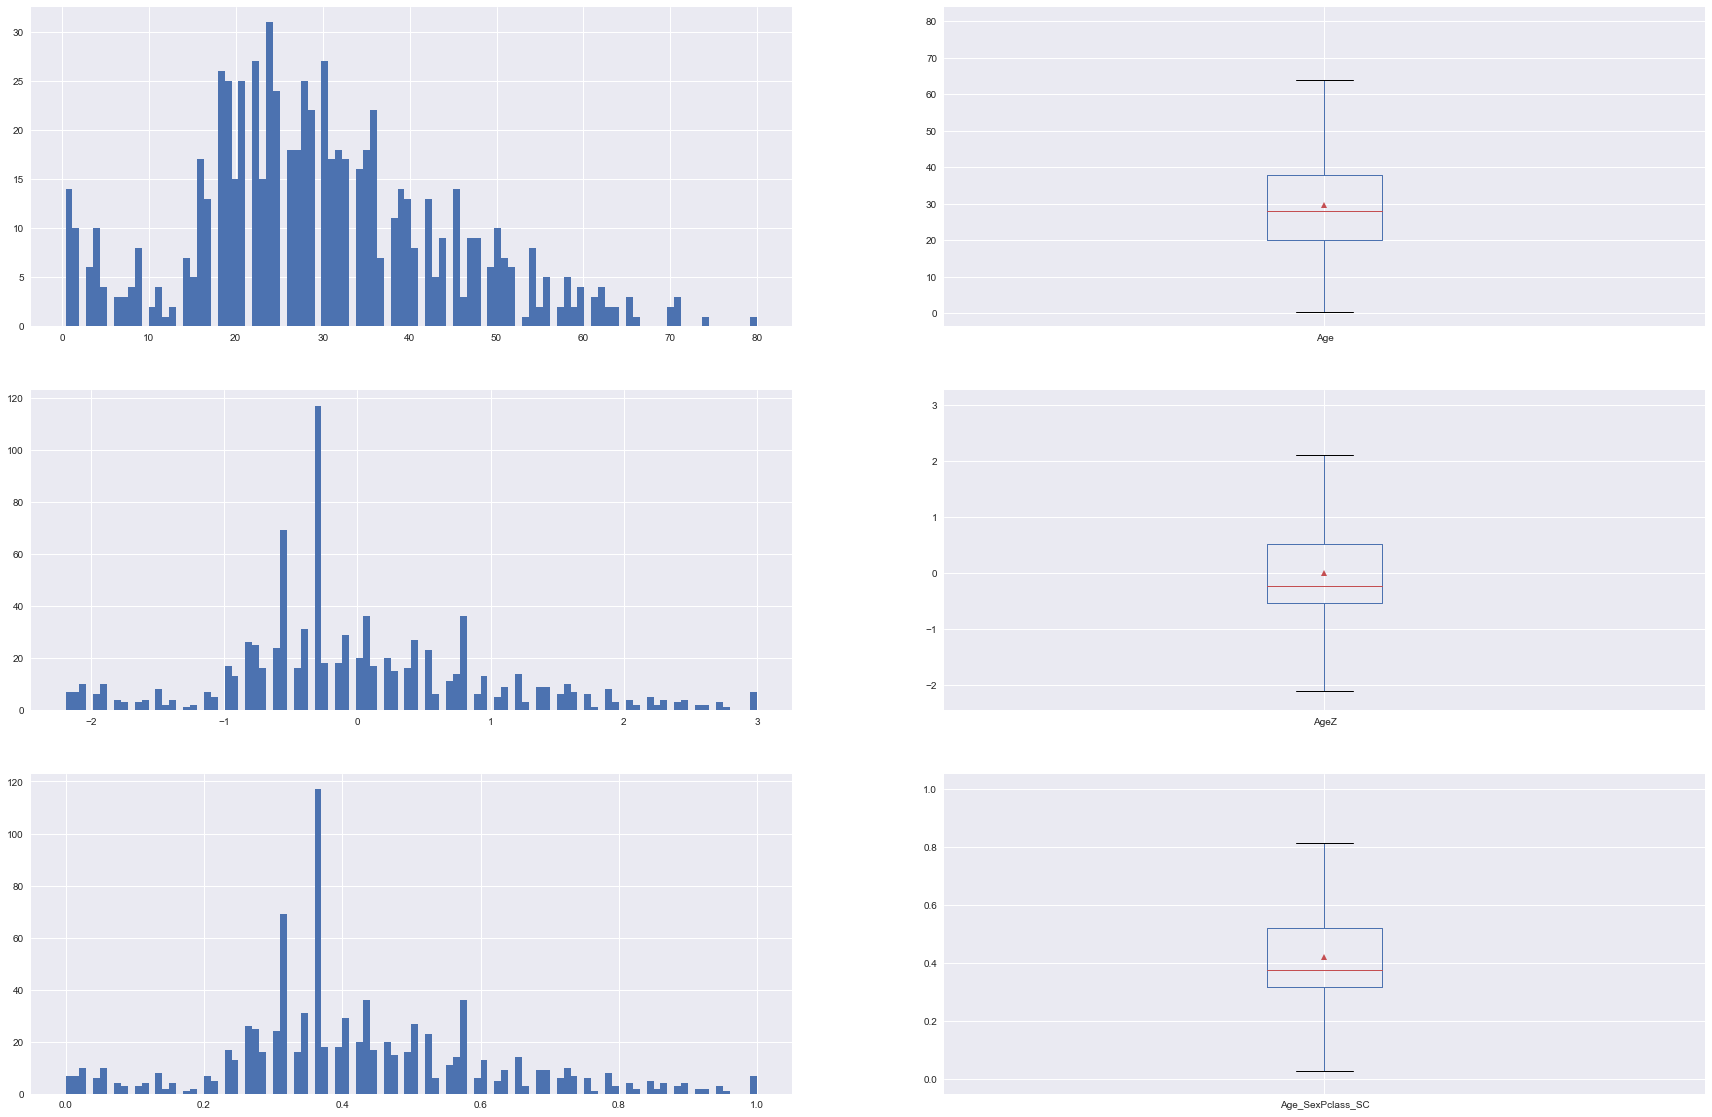

In [30]:
# Transform Age Median Feature
ageTrainMean = train_df['Age_SexPclass'].mean()
ageTrainStd = train_df['Age_SexPclass'].std(ddof=0)

for dataset in all_df: 
    
    #dataset['AgeT'] = np.log10(dataset['Age_SexPclass'])
    
    # Calculate z-score of Transformed Age Column
    dataset["AgeZ"] = (dataset['Age_SexPclass'] - ageTrainMean)/ageTrainStd
    
    # Manage outlier data
    dataset.loc[dataset.AgeZ > 3, "AgeZ"] = 3
    dataset.loc[dataset.AgeZ < -3, "AgeZ"] = -3

scaler = MinMaxScaler()
scaler.fit(train_df[['AgeZ']].values)

train_df['Age_SexPclass_SC'] = scaler.transform(train_df[['AgeZ']].values)
test_df['Age_SexPclass_SC'] = scaler.transform(test_df[['AgeZ']].values)
    
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20));
train_df['Age'].hist(bins=100, ax=axes[0][0])
train_df['AgeZ'].hist(bins=100, ax=axes[1][0])
train_df['Age_SexPclass_SC'].hist(bins=100, ax=axes[2][0])

train_df[['Age']].boxplot(ax=axes[0][1], showmeans=True)
train_df[['AgeZ']].boxplot(ax=axes[1][1], showmeans=True)
train_df[['Age_SexPclass_SC']].boxplot(ax=axes[2][1], showmeans=True)

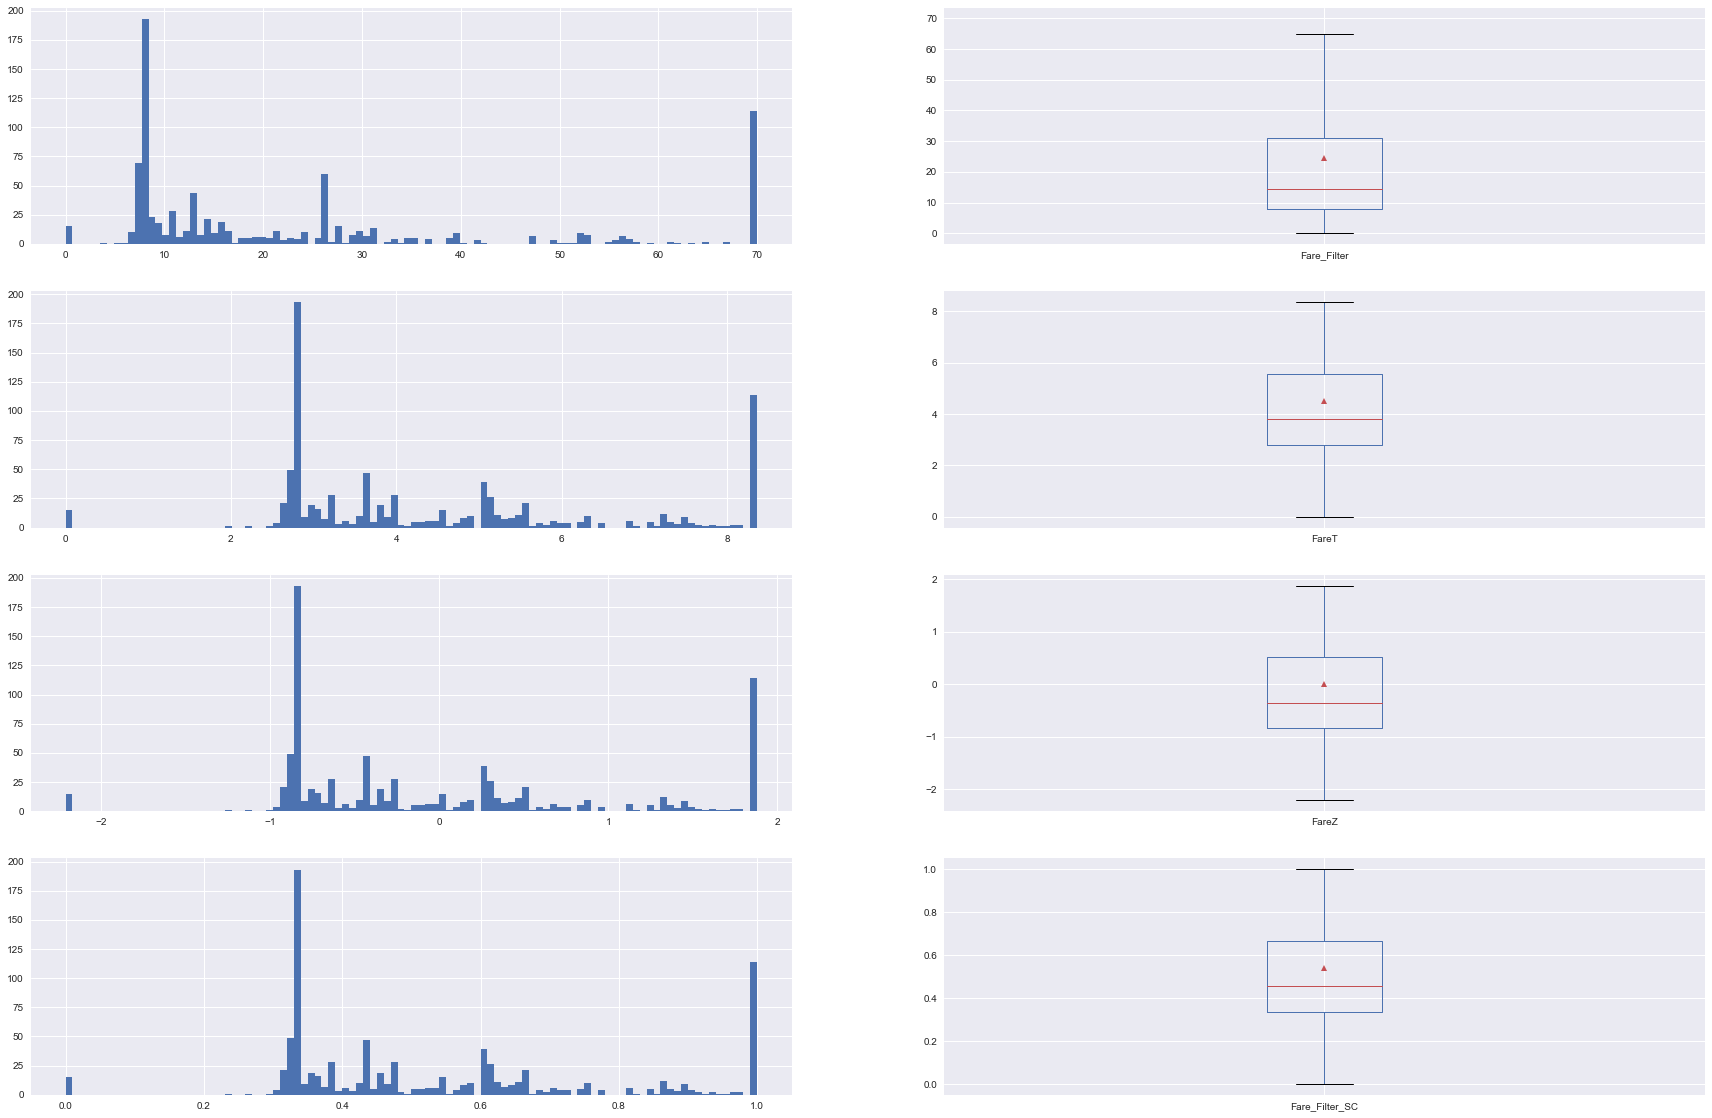

In [31]:
# Transform Fare Feature
for dataset in all_df: 
    # Filter outlier data
    dataset['Fare_Filter'] = dataset['Fare']
    dataset.loc[dataset.Fare_Filter > 70, "Fare_Filter"] = 70
    #dataset.loc[dataset.Fare_Filter < 6, "Fare_Filter"] = 6
    dataset['Fare_Filter'].fillna(dataset['Fare_Filter'].mean(), inplace = True)
    
    # Transform Fare Column
    dataset['FareT'] = np.sqrt(dataset[['Fare_Filter']])
    #dataset['FareT'] = dataset[['Fare_Filter']]
    
    fareTrainMean = train_df['FareT'].mean()
    fareTrainStd = train_df['FareT'].std(ddof=0)
        
    # Calculate z-score of Transformed Fare Column
    dataset["FareZ"] = (dataset['FareT'] - fareTrainMean)/fareTrainStd
    
    # Manage outlier data
    dataset.loc[dataset.FareZ > 3, "FareZ"] = 3
    dataset.loc[dataset.FareZ < -3, "FareZ"] = -3

scaler = MinMaxScaler()
scaler.fit(train_df[['FareZ']].values)

train_df['Fare_Filter_SC'] = scaler.transform(train_df[['FareZ']].values)
test_df['Fare_Filter_SC'] = scaler.transform(test_df[['FareZ']].values)
    
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30, 20));
train_df['Fare_Filter'].hist(bins=100, ax=axes[0][0])
train_df['FareT'].hist(bins=100, ax=axes[1][0])
train_df['FareZ'].hist(bins=100, ax=axes[2][0])
train_df['Fare_Filter_SC'].hist(bins=100, ax=axes[3][0])

train_df[['Fare_Filter']].boxplot(ax=axes[0][1], showmeans=True)
train_df[['FareT']].boxplot(ax=axes[1][1], showmeans=True)
train_df[['FareZ']].boxplot(ax=axes[2][1], showmeans=True)
train_df[['Fare_Filter_SC']].boxplot(ax=axes[3][1], showmeans=True)

    Title  Survived
0  Master        40
1    Miss       185
2      Mr       517
3     Mrs       126
4    Rare        23


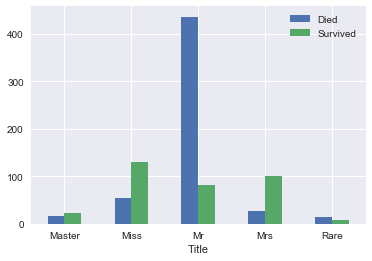

In [32]:
# Title feature
for dataset in all_df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title_Index'] = dataset['Title'].map(title_mapping)
    dataset['Title_Index'] = dataset['Title_Index'].fillna(0)
    
# Info
dfTitleServived = train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).count()
print(dfTitleServived)

# Plot Title Survived
TitleSurvived = train_df[train_df.Survived==1][['Title', 'Survived']] \
    .groupby(['Title'], as_index=False).count()['Survived'].values
TitleDied = train_df[train_df.Survived==0][['Title', 'Survived']] \
    .groupby(['Title'], as_index=False).count()['Survived'].values

index = train_df[train_df.Survived==1][['Title', 'Survived']] \
    .groupby(['Title'], as_index=False).count()['Title']
    
df = pd.DataFrame({'Survived': TitleSurvived,
                   'Died': TitleDied}, index=index)

ax = df.plot.bar(rot=0)

IsAlone  Survived
0        0           175
         1           179
1        0           374
         1           163
Name: Survived, dtype: int64


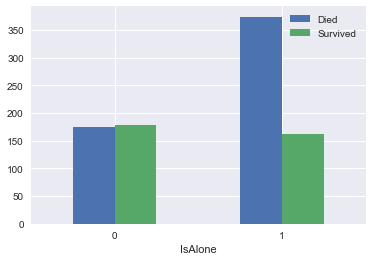

In [33]:
# Group Family and check is alone
for dataset in all_df: 
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1 
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0
    
# Info
dfIsAloneSurvived = train_df[['IsAlone', 'Survived']] \
    .groupby(['IsAlone', 'Survived'])['Survived'].count()
print(dfIsAloneSurvived)
    
# Plot IsAlone Survived
dfIsAloneSurvived = train_df[train_df.Survived==1][['IsAlone', 'Survived']] \
    .groupby(['IsAlone'], as_index=False).count()['Survived'].values
dfIsAloneDied = train_df[train_df.Survived==0][['IsAlone', 'Survived']] \
    .groupby(['IsAlone'], as_index=False).count()['Survived'].values


index = train_df[train_df.Survived==1][['IsAlone', 'Survived']] \
    .groupby(['IsAlone'], as_index=False).count()['IsAlone']
    
df = pd.DataFrame({'Survived': dfIsAloneSurvived,
                   'Died': dfIsAloneDied}, index=index)

df.plot.bar(rot=0)

  Fare_Median_Band  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081
Fare_Median_Index  Survived
0                  0           179
                   1            44
1                  0           150
                   1            67
2                  0           127
                   1           102
3                  0            93
                   1           129
Name: Survived, dtype: int64


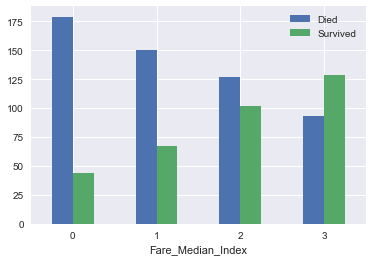

In [34]:
# Group Fare
for dataset in all_df:    

    # Fill missing fare with median
    dataset['Fare_Median'] = dataset['Fare']
    dataset['Fare_Median'].fillna(dataset['Fare_Median'].median(), inplace = True)
    
train_df['Fare_Median_Band'] = pd.qcut(train_df['Fare_Median'], 4)
print(train_df[['Fare_Median_Band', 'Survived']] \
    .groupby(['Fare_Median_Band'], as_index=False).mean().sort_values(by='Fare_Median_Band', ascending=True))
    
for dataset in all_df:
    dataset['Fare_Median_Index'] = 0
    dataset.loc[ dataset['Fare_Median'] <= 7.91, 'Fare_Median_Index'] = 0
    dataset.loc[(dataset['Fare_Median'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare_Median_Index'] = 1
    dataset.loc[(dataset['Fare_Median'] > 14.454) & (dataset['Fare'] <= 31), 'Fare_Median_Index']   = 2
    dataset.loc[ dataset['Fare_Median'] > 31, 'Fare_Median_Index'] = 3
    dataset['Fare_Median_Index'] = dataset['Fare_Median_Index'].astype(int)
    
# Info
dfFareBinSurvived = train_df[['Fare_Median_Index', 'Survived']] \
    .groupby(['Fare_Median_Index', 'Survived'])['Survived'].count()
print(dfFareBinSurvived)

# Plot FareBin Survived
FareBinSurvived = train_df[train_df.Survived==1][['Fare_Median_Index', 'Survived']] \
    .groupby(['Fare_Median_Index'], as_index=False).count()['Survived'].values
FareBinDied = train_df[train_df.Survived==0][['Fare_Median_Index', 'Survived']] \
    .groupby(['Fare_Median_Index'], as_index=False).count()['Survived'].values

index = train_df[train_df.Survived==1][['Fare_Median_Index', 'Survived']] \
    .groupby(['Fare_Median_Index'], as_index=False).count()['Fare_Median_Index']
    
df = pd.DataFrame({'Survived': FareBinSurvived,
                   'Died': FareBinDied}, index=index)

ax = df.plot.bar(rot=0)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64


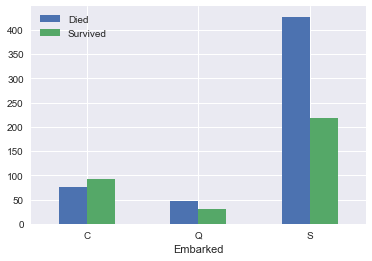

In [35]:
freq_port = train_df.Embarked.dropna().mode()[0]
label = LabelEncoder()
for dataset in all_df:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked_Index'] = label.fit_transform(dataset['Embarked'])
    
# Info
dfFareBinSurvived = train_df[['Embarked', 'Survived']] \
    .groupby(['Embarked', 'Survived'])['Survived'].count()
print(dfFareBinSurvived)

# Plot FareBin Survived
FareBinSurvived = train_df[train_df.Survived==1][['Embarked', 'Survived']] \
    .groupby(['Embarked'], as_index=False).count()['Survived'].values
FareBinDied = train_df[train_df.Survived==0][['Embarked', 'Survived']] \
    .groupby(['Embarked'], as_index=False).count()['Survived'].values

index = train_df[train_df.Survived==1][['Embarked', 'Survived']] \
    .groupby(['Embarked'], as_index=False).count()['Embarked']
    
df = pd.DataFrame({'Survived': FareBinSurvived,
                   'Died': FareBinDied}, index=index)

ax = df.plot.bar(rot=0)

In [36]:
# Cabin Feature
label = LabelEncoder()
for dataset in all_df:        
    #Replace cabin number with cabin type
    dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])
    dataset['Cabin_Index'] = label.fit_transform(dataset['Cabin'])
    

# Info
dfFareBinSurvived = train_df[['Cabin', 'Survived']] \
    .groupby(['Cabin', 'Survived'])['Survived'].count()
print(dfFareBinSurvived)



Cabin  Survived
A      0             8
       1             7
B      0            12
       1            35
C      0            24
       1            35
D      0             8
       1            25
E      0             8
       1            24
F      0             5
       1             8
G      0             2
       1             2
T      0             1
X      0           481
       1           206
Name: Survived, dtype: int64


In [37]:
for dataset in all_df:
    dataset['Age_Mean_Band_Class'] = dataset.Age_Mean_Band * dataset.Pclass
    dataset['Age_Median_Band_Class'] = dataset.Age_Median_Band * dataset.Pclass
    dataset['Age_SexPclass_Band_Class'] = dataset.Age_SexPclass_Band * dataset.Pclass

train_df[['Age', 'Pclass', 'Age_Mean_Band_Class','Age_Median_Band_Class','Age_SexPclass_Band_Class', ]].head()

,Age,Pclass,Age_Mean_Band_Class,Age_Median_Band_Class,Age_SexPclass_Band_Class
0,22.0,3,3,3,3
1,38.0,1,2,2,2
2,26.0,3,3,3,3
3,35.0,1,2,2,2
4,35.0,3,6,6,6


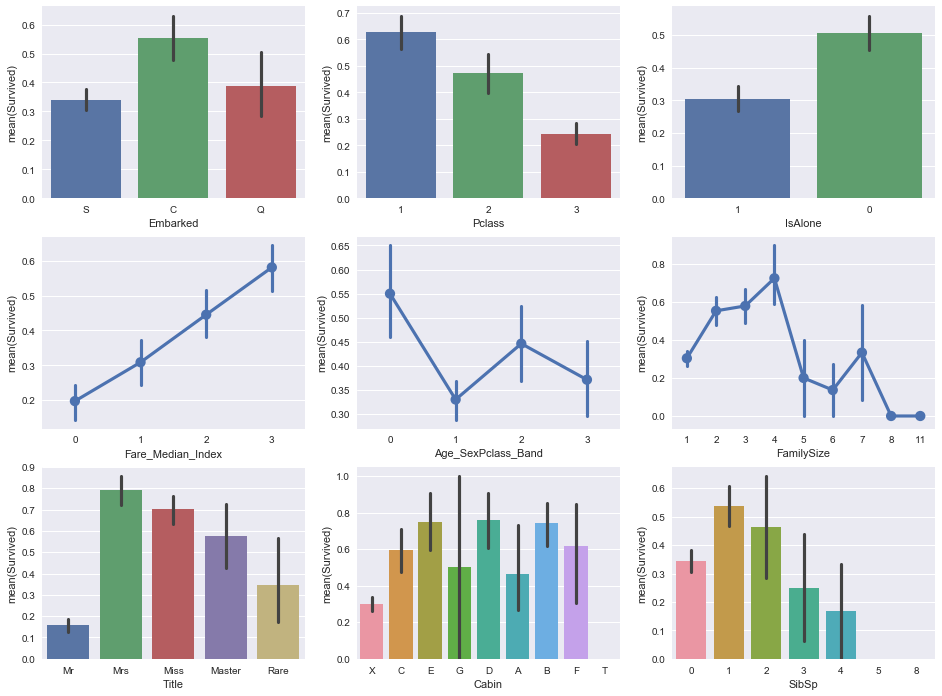

In [59]:
# Plot individual features by survival
fig, saxis = plt.subplots(3, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=train_df, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train_df, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=train_df, ax = saxis[0,2])


sns.pointplot(x = 'Fare_Median_Index', y = 'Survived',  data=train_df, ax = saxis[1,0])
sns.pointplot(x = 'Age_SexPclass_Band', y = 'Survived',  data=train_df, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=train_df, ax = saxis[1,2])

sns.barplot(x = 'Title', y = 'Survived', data=train_df, ax = saxis[2,0])
sns.barplot(x = 'Cabin', y = 'Survived', data=train_df, ax = saxis[2,1])
sns.barplot(x = 'SibSp', y = 'Survived', data=train_df, ax = saxis[2,2])

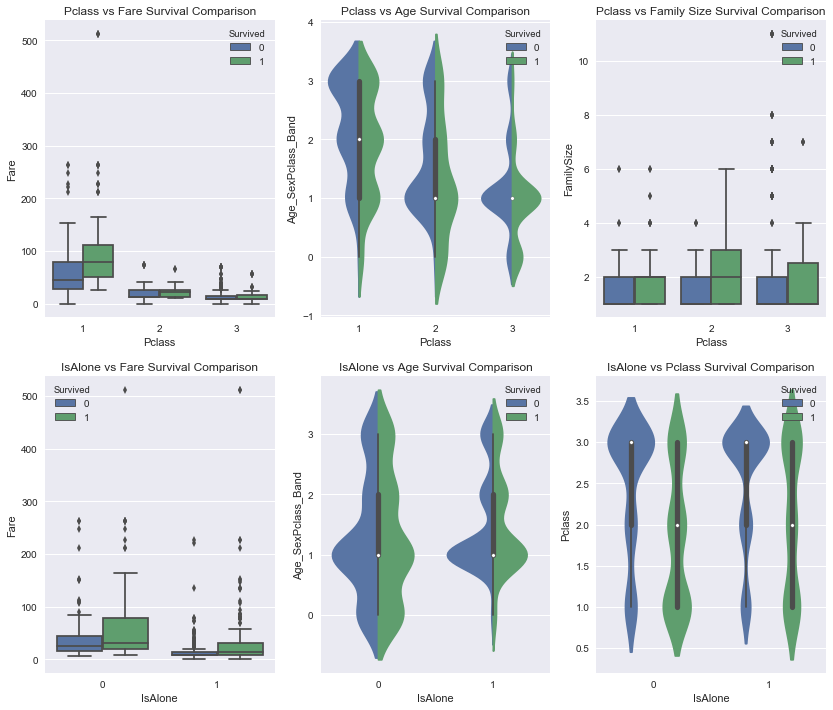

In [39]:
# Plot compare feature by survival
fig, saxis = plt.subplots(2,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train_df, ax = saxis[0][0])
saxis[0][0].set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age_SexPclass_Band', hue = 'Survived', data = train_df, split = True, ax = saxis[0][1])
saxis[0][1].set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = train_df, ax = saxis[0][2])
saxis[0][2].set_title('Pclass vs Family Size Survival Comparison')

sns.boxplot(x = 'IsAlone', y = 'Fare', hue = 'Survived', data = train_df, ax = saxis[1][0])
saxis[1][0].set_title('IsAlone vs Fare Survival Comparison')

sns.violinplot(x = 'IsAlone', y = 'Age_SexPclass_Band', hue = 'Survived', data = train_df, split = True, ax = saxis[1][1])
saxis[1][1].set_title('IsAlone vs Age Survival Comparison')

sns.violinplot(x = 'IsAlone', y ='Pclass', hue = 'Survived', data = train_df, ax = saxis[1][2])
saxis[1][2].set_title('IsAlone vs Pclass Survival Comparison')

In [40]:
#print(train_df.columns)
# Select Feature
columns = ['Pclass',  
           #'SibSp',
           #'Parch',   
           'Sex_Index', 
           #'Age_Mean',
           #'Age_Mean_Band', 
           #'Age_Median', 
           #'Age_Median_Band', 
           #'Age_SexPclass',
           'Age_SexPclass_Band', 
           #'Age_Mean_SC', 
           #'Age_Median_SC',
           #'Age_SexPclass_SC', 
           'Title_Index', 
           #'FamilySize', 
           'IsAlone',
           #'Fare_Median', 
           #'Fare_Median_Band', 
           'Fare_Median_Index',
           #'Fare_Filter_SC',
           'Embarked_Index', 
           'Cabin_Index',
           #'Age_Mean_Band_Class',
           #'Age_Median_Band_Class'
           'Age_SexPclass_Band_Class'
           
            ]
X_train = train_df[columns]
Y_train = train_df["Survived"]
X_test = test_df[columns]
X_train.head()

,Pclass,Sex_Index,Age_SexPclass_Band,Title_Index,IsAlone,Fare_Median_Index,Embarked_Index,Cabin_Index,Age_SexPclass_Band_Class
0,3,0,1,1,0,0,2,8,3
1,1,1,2,3,0,3,0,2,2
2,3,1,1,2,1,1,2,8,3
3,1,1,2,3,0,3,2,2,2
4,3,0,2,1,1,1,2,8,6


In [41]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

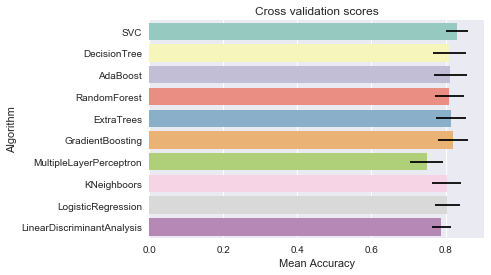

In [42]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    "CrossValMeans":cv_means,
    "CrossValerrors": cv_std,
    "Algorithm":[
        "SVC","DecisionTree","AdaBoost",
        "RandomForest","ExtraTrees","GradientBoosting",
        "MultipleLayerPerceptron","KNeighboors","LogisticRegression",
        "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")



In [43]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.01, 0.1, 0.2]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    0.9s finished


0.81593714927048255

In [44]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3],
              "min_samples_split": [2, 3],
              "min_samples_leaf": [1, 3],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_



Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:   11.6s finished


0.81930415263748602

In [45]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": ["auto"],
              "min_samples_split": [2, 3],
              "min_samples_leaf": [1, 3],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    6.8s finished


0.81818181818181823

In [46]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_



Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   16.7s finished


0.81593714927048255

In [47]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    9.7s finished


0.82491582491582494

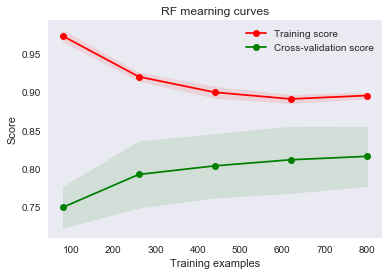

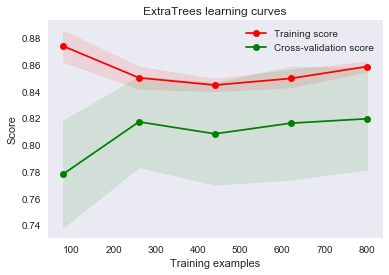

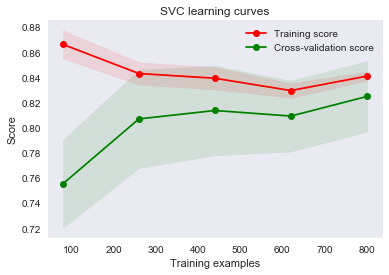

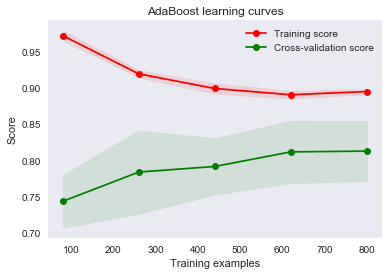

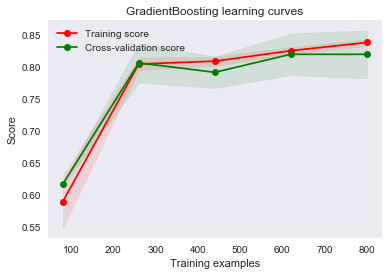

In [48]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)



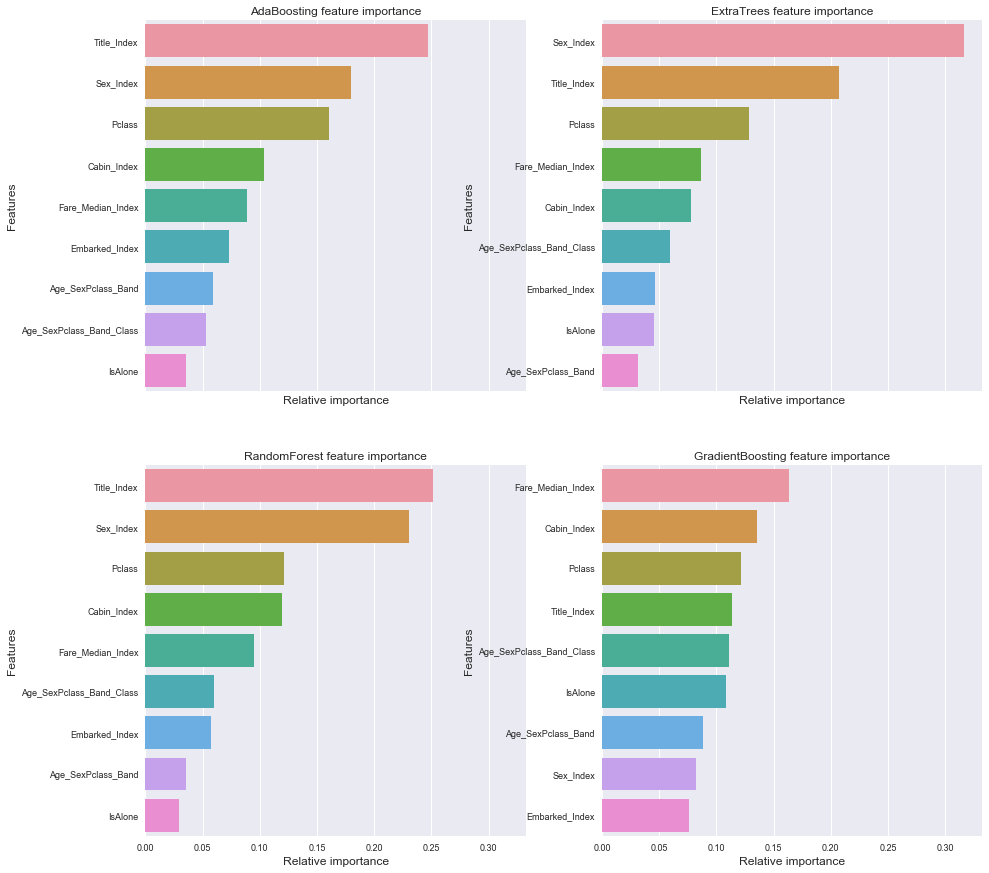

In [49]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

Voting Classifier
Accuracy: 88.66
['Pclass' 'Sex_Index' 'Age_SexPclass_Band' 'Title_Index' 'IsAlone'
 'Fare_Median_Index' 'Embarked_Index' 'Cabin_Index'
 'Age_SexPclass_Band_Class']


/Users/tyoshida/.pyenv/versions/3.6.5/envs/machine-learning/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


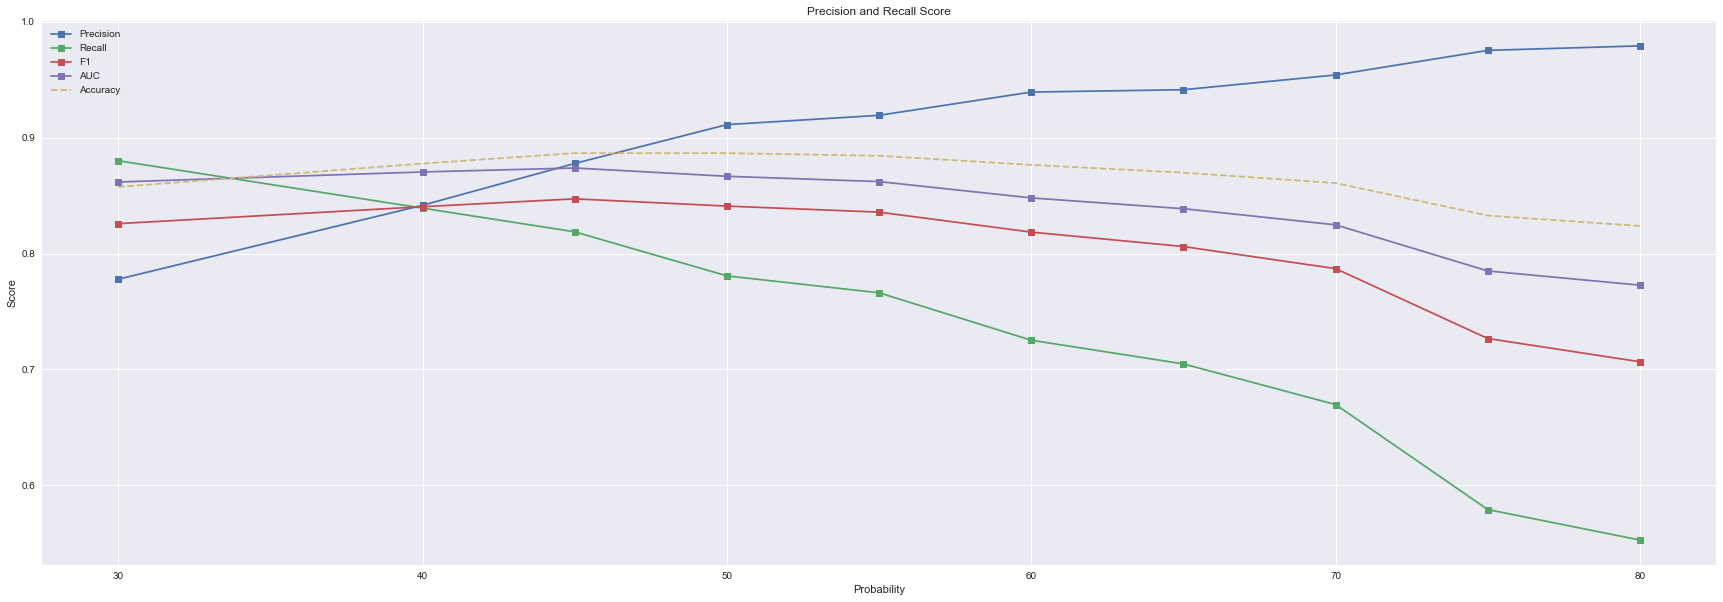

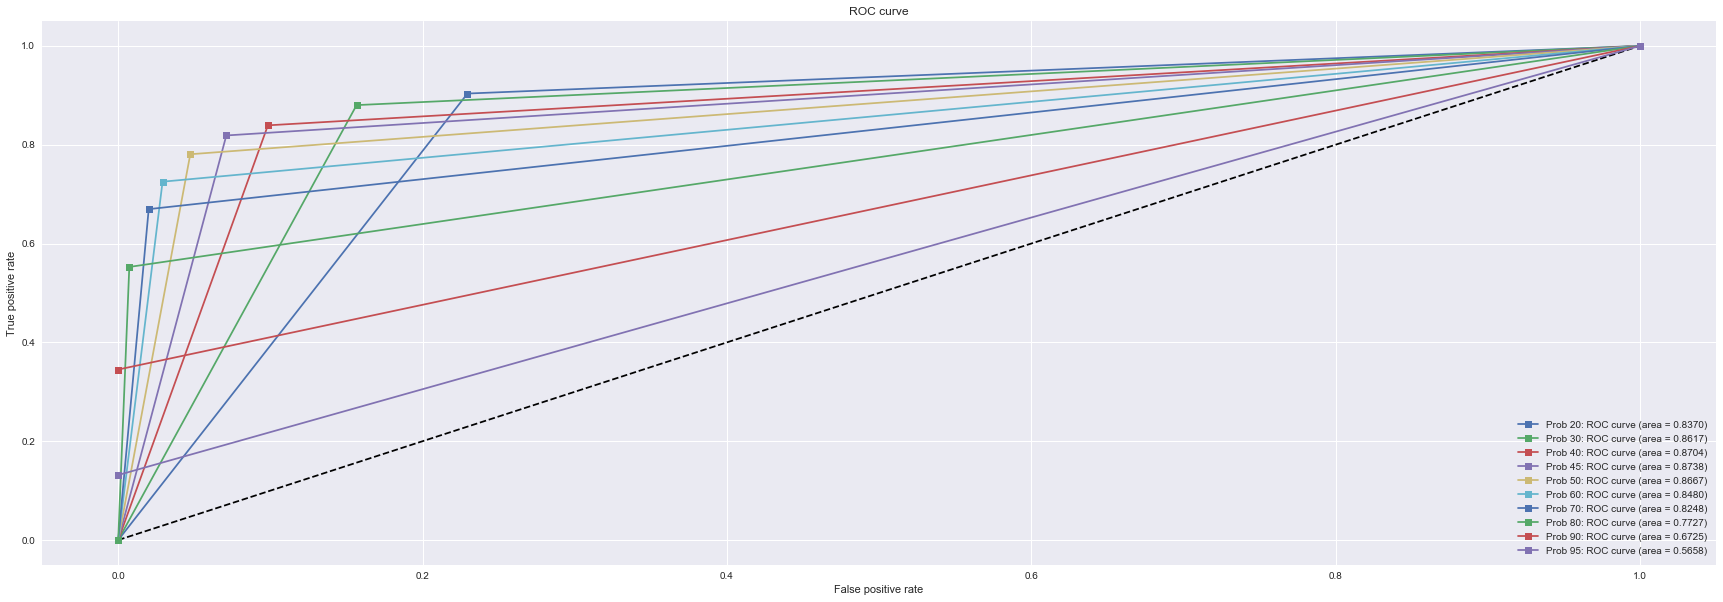

In [50]:
# Voting Classifier
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)
votingC.fit(X_train, Y_train)
Y_pred = votingC.predict(X_test)
Y_pred_prob = votingC.predict_proba(X_test)
votingC.score(X_train, Y_train)
acc_votingC = round(votingC.score(X_train, Y_train) * 100, 2)
print("Voting Classifier")
print("Accuracy:",acc_votingC)
print(X_train.columns.values)

EvalPrediction = train_df[columns]
#EvalPrediction['Prediction'] = pd.Series(random_forest.predict(X_train))
EvalPrediction = EvalPrediction.assign(Prediction=votingC.predict(X_train))
#EvalPrediction['Probability'] = pd.Series(random_forest.predict_proba(X_train)[:,1])
EvalPrediction = EvalPrediction.assign(Probability=votingC.predict_proba(X_train)[:,1]*100)
#EvalPrediction['Prediction'] = random_forest.predict(X_train)
EvalPrediction = EvalPrediction.assign(Label=train_df['Survived'])

probabilities = [30,40,45,50,55,60,65,70,75,80]
dfDatasetTmp = EvalPrediction[['Label', 'Prediction', 'Probability']]

probs = []
precision_ = []
recall_ = []
f1_ = []
acc_ = []
auc_ = []

for prob in probabilities:
    
    dfDatasetTmp.loc[dfDatasetTmp.Probability > prob, ['Prediction']] = 1
    dfDatasetTmp.loc[dfDatasetTmp.Probability <= prob, ['Prediction']] = 0

    y_true = dfDatasetTmp['Label'].values
    y_pred = dfDatasetTmp['Prediction'].values
    
    pre_s = precision_score(y_true, y_pred)
    re_s = recall_score(y_true, y_pred)
    f1_s = f1_score(y_true, y_pred)
    acc_s = accuracy_score(y_true, y_pred)
    auc_s = roc_auc_score(y_true, y_pred)
    
    probs.append(prob)
    precision_.append(pre_s)
    recall_.append(re_s)
    f1_.append(f1_s)
    auc_.append(auc_s)
    acc_.append(acc_s)
    
    
plt.figure(figsize=(30, 10))
plt.plot(probs, precision_, 's-', label='Precision') 
plt.plot(probs, recall_, 's-', label='Recall') 
plt.plot(probs, f1_, 's-', label='F1') 
plt.plot(probs, auc_, 's-', label='AUC') 
plt.plot(probs, acc_,'--', label='Accuracy')
plt.xlabel('Probability')
plt.ylabel('Score')
plt.title('Precision and Recall Score')
plt.legend(loc='best')
plt.grid(True,which='both')
plt.show()

probabilities = [20,30,40,45,50,60,70,80,90,95]
dfDatasetTmp = EvalPrediction[['Label', 'Prediction', 'Probability']]

plt.figure(figsize=(30, 10))
plt.plot([0, 1], [0, 1], 'k--')

for prob in probabilities:
    dfDatasetTmp.loc[dfDatasetTmp.Probability > prob, 'Prediction'] = 1
    dfDatasetTmp.loc[dfDatasetTmp.Probability <= prob, 'Prediction'] = 0
    
    y_true = dfDatasetTmp['Label'].values
    y_pred = dfDatasetTmp['Prediction'].values
    
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    
    #print(fpr, tpr)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, "s-", label='Prob %d: ROC curve (area = %0.4f)' % (prob, roc_auc))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('vt-50.csv', index=False)

# 45
newDf = {'Probability': Y_pred_prob[:,1]*100}
dfDatasetTmp = pd.DataFrame(data=newDf)
dfDatasetTmp.loc[dfDatasetTmp.Probability > 45, 'Prediction'] = 1
dfDatasetTmp.loc[dfDatasetTmp.Probability <= 45, 'Prediction'] = 0
Y_pred = dfDatasetTmp['Prediction'].astype(int)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('vt-45.csv', index=False)


# 60
newDf = {'Probability': Y_pred_prob[:,1]*100}
dfDatasetTmp = pd.DataFrame(data=newDf)
dfDatasetTmp.loc[dfDatasetTmp.Probability > 60, 'Prediction'] = 1
dfDatasetTmp.loc[dfDatasetTmp.Probability <= 60, 'Prediction'] = 0
Y_pred = dfDatasetTmp['Prediction'].astype(int)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('vt-60.csv', index=False)

# 70
newDf = {'Probability': Y_pred_prob[:,1]*100}
dfDatasetTmp = pd.DataFrame(data=newDf)
dfDatasetTmp.loc[dfDatasetTmp.Probability > 70, 'Prediction'] = 1
dfDatasetTmp.loc[dfDatasetTmp.Probability <= 70, 'Prediction'] = 0
Y_pred = dfDatasetTmp['Prediction'].astype(int)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('vt-70.csv', index=False)

# 80
newDf = {'Probability': Y_pred_prob[:,1]*100}
dfDatasetTmp = pd.DataFrame(data=newDf)
dfDatasetTmp.loc[dfDatasetTmp.Probability > 80, 'Prediction'] = 1
dfDatasetTmp.loc[dfDatasetTmp.Probability <= 80, 'Prediction'] = 0
Y_pred = dfDatasetTmp['Prediction'].astype(int)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('vt-80.csv', index=False)